<a href="https://colab.research.google.com/github/GOPIKAV77/Python/blob/main/figure_plot_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import scipy.sparse as sp
import scipy.sparse.linalg
import scipy.linalg as ls

In [14]:
N = 1000

u_1,u_2 = 10,-10
u_11, u_12 = 7,-7

dx = 1/(N+1)

N1 = (sp.eye(N, k = -2) - 4*sp.eye(N)+ sp.eye(N, k = 2))/dx**2

N2 = sp.kron(sp.eye(N),N1)+ (sp.eye(N**2, k= -N)+sp.eye(N**2, k=N))/dx**2

N2

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4994000 stored elements and shape (1000000, 1000000)>

In [19]:
import numpy as np
l = np.zeros((N,N))

l[0,:] += u_2
l[-1,:] += u_1
l[:,0] += u_11
l[:,-1] += u_12

l = -l.reshape(N**2)/dx**2

In [21]:
m = sp.linalg.spsolve(N2, l)
n = m.reshape(N,N)

In [24]:
X = np.vstack([np.ones((1,N+2))*u_2,np.hstack([np.ones((N,1))*u_11,n,np.ones((N,1))*u_12]),np.ones((1,N+2))*u_12])

In [26]:
k = np.linspace(0,1,N+2)

In [27]:
K,M = np.meshgrid(k,k)

<ipython-input-33-b03dfdf3cc45>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = mpl.cm.get_cmap('Blues')


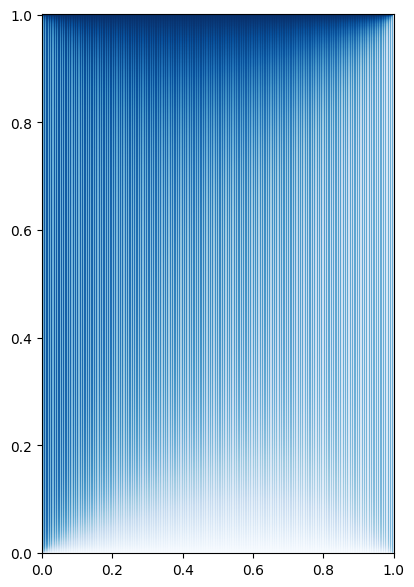

In [33]:
import matplotlib as mpl
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,7))

cmap = mpl.cm.get_cmap('Blues')

ax = fig.add_subplot(1,2,1)
c = ax.pcolor(K,M,X,vmin = -10, vmax = 10, cmap = cmap)